## Сети прямого распространения

Повторение:

Тензор:

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.IntTensor([2,3])

tensor([2, 3], dtype=torch.int32)

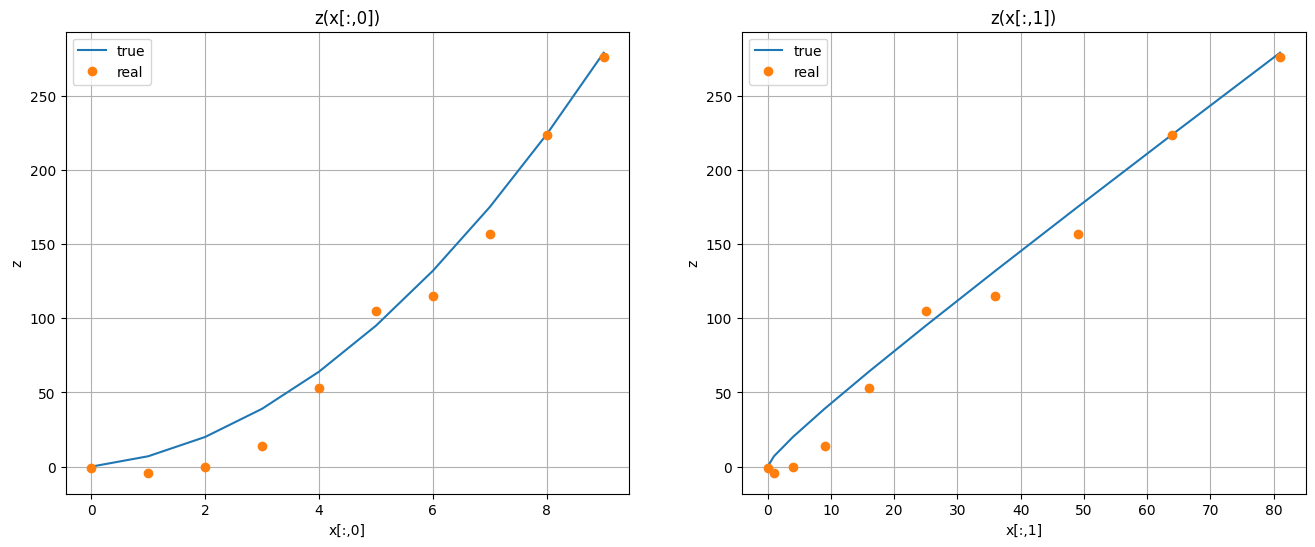

In [3]:
# 2d math tensor:-----------------------------------------
x = torch.Tensor([[i, i**2] for i in range(10)])

z = x[:,0] * 4 + x[:,1] * 3
y = x[:,0] * 4 + x[:,1] * 3 + torch.randn((z.size()))*10

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(x[:,0].numpy() , z ,label = 'true')
plt.plot(x[:,0].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,0]')
plt.ylabel('z')
plt.title('z(x[:,0])')

plt.subplot(1,2,2)
plt.plot(x[:,1].numpy() , z , label = 'true')
plt.plot(x[:,1].numpy() , y, 'o' , label = 'real')
plt.legend()
plt.grid()
plt.xlabel('x[:,1]')
plt.ylabel('z')
plt.title('z(x[:,1])')

plt.show()

Цикл обработки:

посчитать функцию от 

In [4]:
loss_func = torch.nn.MSELoss()
y.requires_grad = True
x.requires_grad = True

loss = loss_func(z, y).mean()

Посчитать градиент :)

In [5]:
loss.backward()

In [6]:
y.grad

tensor([-0.2034, -2.2198, -4.0277, -4.9734, -2.1803,  1.9561, -3.4607, -3.5732,
        -0.0491, -0.5194])

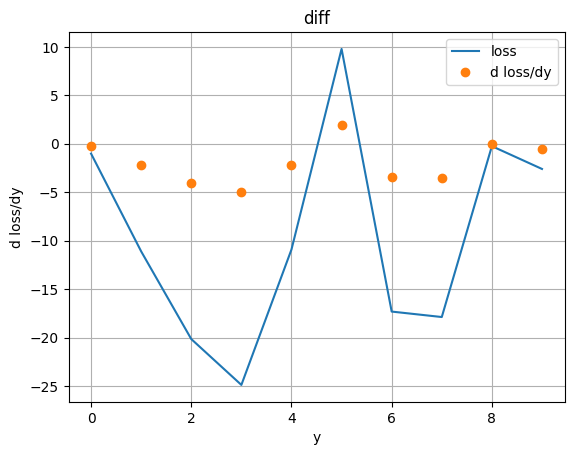

In [7]:
y_ = y.detach().numpy() 
l_ =loss.detach().numpy() 
dy = y.grad

#plt.plot( y_, label = 'y')
plt.plot(y_ - z.numpy() , label = 'loss')
plt.plot( dy, 'o' , label = 'd loss/dy')
plt.legend()
plt.grid()
plt.xlabel('y')
plt.ylabel('d loss/dy')
plt.title('diff')

plt.show()

In [8]:
x.grad

Как увидеть связь для х, у

In [9]:

y = x[:,0] * 4 + x[:,1] * 3 + torch.randn((z.size()))*10

y.sum().backward()

In [10]:
x.grad

tensor([[4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.],
        [4., 3.]])

Пример еще:

In [11]:
xyz = torch.Tensor([1., 2.,3.])
xyz.requires_grad = True

y = xyz[1]**4 + xyz[0]*2 - xyz[2]**0.5

y.backward()

xyz.grad

tensor([ 2.0000, 32.0000, -0.2887])

# Feed-forward neural network

<img src="https://drive.google.com/uc?export=view&id=1K1rumu2ZTPO0S7-7f7nNegp-D-MXrUI-">

Давайте вспомним, что такое нейронные сети прямого распространения. 

Розенблат линейный перцептрон. Однослойный. Маккалок-Пиитс формальный нейрон

Нейронные сети прямого распространения (feed forward neural networks, FF или FFNN) и перцептроны (perceptrons, P) очень прямолинейны, они передают информацию от входа к выходу. Нейронные сети часто описываются в виде слоёного торта, где каждый слой состоит из входных, скрытых или выходных клеток. Клетки одного слоя не связаны между собой, а соседние слои обычно полностью связаны. Самая простая нейронная сеть имеет две входных клетки и одну выходную, и может использоваться в качестве модели логических вентилей. FFNN обычно обучается по методу обратного распространения ошибки, в котором сеть получает множества входных и выходных данных. Этот процесс называется обучением с учителем, и он отличается от обучения без учителя тем, что во втором случае множество выходных данных сеть составляет самостоятельно. Вышеупомянутая ошибка является разницей между вводом и выводом. Если у сети есть достаточное количество скрытых нейронов, она теоретически способна смоделировать взаимодействие между входным и выходными данными. Практически такие сети используются редко, но их часто комбинируют с другими типами для получения новых.

По сути - это последовательность матричных умножений

### Инициализация весов и функции активации

<img src='https://drive.google.com/uc?export=view&id=14zSYfRzDax_bDT-8wir83UJx2DUUdxst'>

Активационная функия линейная убивает все усилия по многослойности и построению гибких решений. (книга Минского-Пайперта)
https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D0%BE%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD_%D0%A0%D1%83%D0%BC%D0%B5%D0%BB%D1%8C%D1%85%D0%B0%D1%80%D1%82%D0%B0

#### Проблема затухающего градиента

Инициализируются веса случайным образом. Но нужно правильным образом инициализировать веса этими случайными значениями чтобы все сошлось.
Почему очень часто люди выбирают Relu в качестве функции активации. Очень большая проблема - это проблема затухающего градиента. 
$$tanh(x) = \frac{2}{1+\mathrm{e}^{-2x}}-1 $$

Раньше нейросети обучали с помощью такой гладкой функцией нелинейности называемой гипорболическим тангенсом. С  ней есть следующая проблема. Предположим что на вход она получила какое-то большое число. Например 4. на выходе эта функия выдаст 1,т.к. 4 очень близко к месту насыщения. На обратном проходе она получит градиент который тоже равен 1. И что же она выдаст на выходе обратного распространения? А выдаст она 0, т.к. в этой точке функция уже не чувствительна к смещению.
Это значит, что как только мы вышли из эффективного пространства этой функции, она сразу уводит значения в 1 или -1 и после этого уже вывести его от туда сверх сложно. Т.к. любой градиент который мы в нее пошлем она превратит в близкое к нулю значение. 
И если наша система состоит из большого количества слоев таких функций, то как только любой из них доходит до такого значения - он сразу убивает возможность нормально тренироваться всей предыдущей части сети. 

<img src='https://drive.google.com/uc?export=view&id=19oHVl2sLsfro7C0Jlz2fL_zoHeL5hUYl' width=800>

#### Rectifier Linear Unit ReLU

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)

А вот у ReLU нет такой проблемы, т.к. она нигде не выходит ни на какую ассимптоту. Она продолжает идти дальше по мере возрастания. Поэтому градиент никогда не затухает даже если очень много слоев впихнуть последовательно. 

<img src='https://drive.google.com/uc?export=view&id=12Yp-5AdkSQl99jeMXkECEgLtFBAZ8zCa' width=400>

Как реализовано в pytorch:

In [13]:
import torch

torch.nn.ReLU()

ReLU()

Но у ReLU есть следующая проблема: бывает так, что  в какой-то момент у конкретной ReLU все точки датасета лежат в области < 0. Т.е. там градиент всегда ноль. Никакая оптимизация не сдвинет ему веса. Но на практике процент нейронов с такой функцией активации очень мал, что не особо мешает обучению.   
Но в современном мире есть альтернативные варианты для ReLU:

<img src='https://drive.google.com/uc?export=view&id=1i1mBXeRaThObNEDYw4fPnHb9AQsju9en' width=600>

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU)

Как реализовано в pytorch:

In [14]:
torch.nn.LeakyReLU(negative_slope=0.01)

LeakyReLU(negative_slope=0.01)

<img src='https://drive.google.com/uc?export=view&id=1yUQbnVHMlTZ6SCvSal-SH5bm5lee1gfD' width=400>

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU)

Как реализовано в pytorch:

In [15]:
torch.nn.ELU(alpha=1.0)

ELU(alpha=1.0)

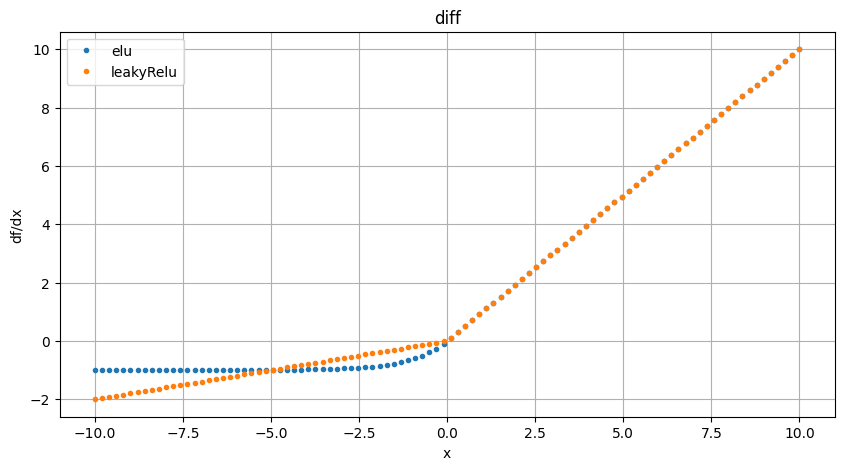

In [16]:
felu = torch.nn.ELU(alpha=1.0)
flrelu = torch.nn.LeakyReLU(negative_slope=0.2)
x = torch.linspace(-10,10,100)

fx1 = felu(x)
fx2 = flrelu(x)


plt.figure(figsize =(10,5))

plt.plot(x.numpy(),fx1.numpy(),'.', label = 'elu')
plt.plot(x.numpy(),fx2.numpy(),'.', label = 'leakyRelu')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('df/dx')
plt.title('diff')

plt.show()

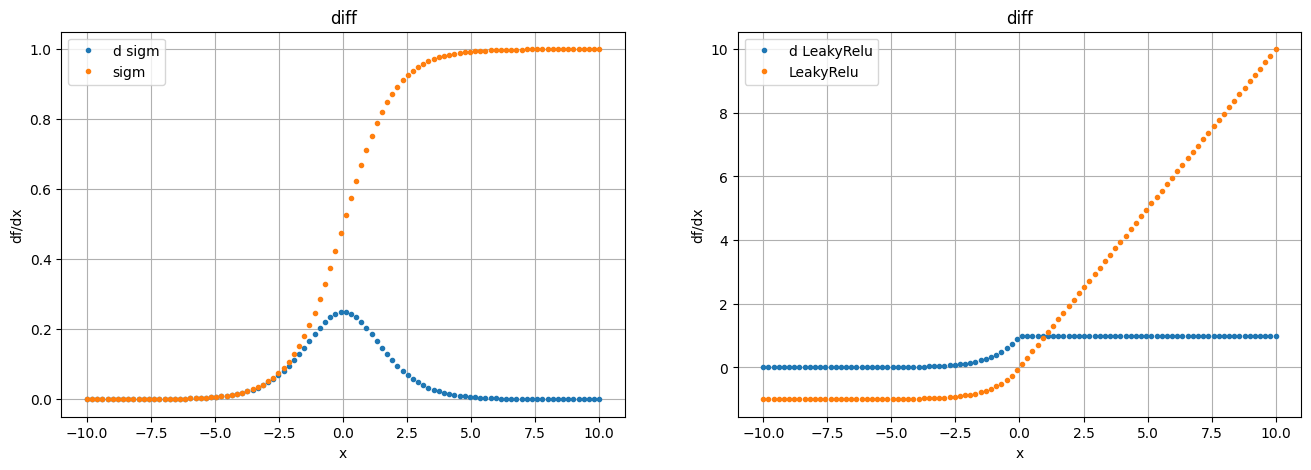

In [17]:
felu = torch.nn.ELU(alpha=1.0)
fs = torch.nn.Sigmoid()
x = torch.linspace(-10,10,100, requires_grad=True)
f2 = felu(x)
f1 = fs(x)

fx1_ = []
fx2_ = []
nx = np.linspace(-10,10,100)

# производные в точке по функциям
for xi in nx:
  x_1 = torch.Tensor([xi])
  x_1.requires_grad=True
  
  x_2 = torch.Tensor([xi])
  x_2.requires_grad=True
  
  fx1_d = felu(x_1)
  fx2_d = fs(x_2)

  fx1_d.backward()
  fx1_ += [x_1.grad.numpy()[0]]
  
  fx2_d.backward()
  fx2_ += [x_2.grad.numpy()[0]]
  

plt.figure(figsize =(16,5))
plt.subplot(1,2,1)
plt.plot(nx,fx2_,'.', label = 'd sigm')
plt.plot(nx,f1.detach().numpy(),'.', label = 'sigm')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('df/dx')
plt.title('diff')

plt.subplot(1,2,2)
plt.plot(nx,fx1_,'.', label = 'd LeakyRelu')
plt.plot(nx,f2.detach().numpy(),'.', label = 'LeakyRelu')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('df/dx')
plt.title('diff')

plt.show()

С остальными функциями активации вы можете ознакомится [здесь](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) и [здесь](https://pytorch.org/docs/stable/nn.html#non-linear-activations-other)

#### Инициализация весов

В самом простом варианте мы можем инициализировать наши веса следующим образом:

$$w = a * random(width, height)$$

Какая тут у нас может возникнуть проблема? Мы начинаем тренировку с того что подаем X и прогоняем его через большое количество слоев.   
Важный вопрос : как выбрать a? В чем проблема? Если мы например выберем a>>1, то каждый из следующих слоев будет умножать выход примерно на a, второй слой на а в квадрате и т.д. И это очень быстро растущая функция. В конце в итоге получится очень большое число, которое может выйти за пределы всех допустимых вычислений. И вернуть по этому числу градиент будет очень сложно.  
А если а<<1, то точно так же градиент будет затухать что приведет к проблеме затухающего градиента.  
Т.е. а нужно выбирать так, что бы функции активации не сильно увеличивались и не сильно уменьшались.

<img src='https://drive.google.com/uc?export=view&id=1ucOBrTAjt4RwlRK8IKsXftls-XOy1f22' width=600>

Есть методы, которые позволяют по размерам w вычислить это правильное значение а:

Со всеми можно познакомиться в разделе [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html) 

##### Xavier initialization

[статья](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.207.2059&rep=rep1&type=pdf)

$$a = \frac{1}{sqrt(in\_num)}\\W = a * random({in\_num}, {out\_num})$$


<img src='https://drive.google.com/uc?export=view&id=1ZzTgjrfAx0l2p_64K6TWZEcCze1cDML6' width=600>

Как реализовано в pytorch:

In [18]:
torch.nn.init.xavier_normal_(torch.empty(3, 5))

tensor([[ 0.3093,  0.3373, -0.1356,  1.0798, -0.4693],
        [-0.4823, -0.2621,  0.4105,  0.7763, -0.6517],
        [-0.5354, -0.1595,  0.8555, -0.0790,  0.1520]])

##### He initialization

[статья](https://arxiv.org/abs/1502.01852)

Небольшой апдейт метода выше. Предназначается для сетей с активацией ReLU. 

$$a = {sqrt(2/in\_num)}\\W = a * random({in\_num}, {out\_num})$$

<img src='https://drive.google.com/uc?export=view&id=1uZmbOPqQhK-JUg_e-1poGEF-O9-R4zLM' width=600>

Как реализовано в pytorch:

In [19]:
torch.nn.init.kaiming_normal_(torch.empty(3, 5))

tensor([[-0.1177,  0.2304, -0.7900, -0.8696, -0.3409],
        [-0.0903, -0.1886,  0.8301,  0.5017,  0.8101],
        [-0.0460,  0.1792, -0.2718,  0.1070, -0.1824]])

## Пример feed-forward сети

Напишим небольшую полносвязную сеть на торче.

In [20]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision

In [27]:
# All torch models are descendent from the Module objecf
# basic Module API includes
# - forward - распознавание
# - backward - вычисление ошибки

# https://pytorch.org/docs/stable/nn.html#linear-layers
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        # y=Ax+b
        self.linear_transform = nn.Linear(2, 2)
        self.relu_activation = nn.ReLU()
        # torch.nn.init.xavier_uniform(self.fc.weight)
        # print(self.fc)

    def forward(self, x):
        print('input', x)
        output = self.linear_transform(x)
        print('output fc', output)
        output = self.relu_activation(output)
        print('output relu', output)
        return output



Создаем объект нового типа Perceptron

In [28]:
# The model of single neuron
perc = Perceptron()
perc

Perceptron(
  (linear_transform): Linear(in_features=2, out_features=2, bias=True)
  (relu_activation): ReLU()
)

In [34]:
# Lets execute the neural network by the input vector
#
perc(torch.FloatTensor([5,2]))

input tensor([5., 2.])
output fc tensor([-2.3024,  2.4115], grad_fn=<ViewBackward0>)
output relu tensor([0.0000, 2.4115], grad_fn=<ReluBackward0>)


tensor([0.0000, 2.4115], grad_fn=<ReluBackward0>)

In [35]:
perc.linear_transform.weight, perc.linear_transform.bias

(Parameter containing:
 tensor([[-0.6141,  0.6756],
         [ 0.2185,  0.5931]], requires_grad=True),
 Parameter containing:
 tensor([-0.5829,  0.1327], requires_grad=True))

# Посмотрим на более сложную архитектуру

In [36]:
class Feedforward(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [37]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim, activation="relu"):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.activation = activation
        
    def forward(self, x):
        x = self.fc(x)
        if self.activation == "relu":
            return F.relu(x)
        if self.activation == "sigmoid":
            return F.sigmoid(x)
        raise RuntimeError
        

class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        self.fc1 = Perceptron(input_dim, hidden_dim)
        self.fc2 = Perceptron(hidden_dim, 1, "sigmoid")
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        print(x)
        return x

In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state0 =  1
x, y = make_classification(random_state=random_state0, n_samples=100, n_features=2, n_informative=2, n_redundant=0, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [61]:
import matplotlib.pyplot as plt

# %pylab inline

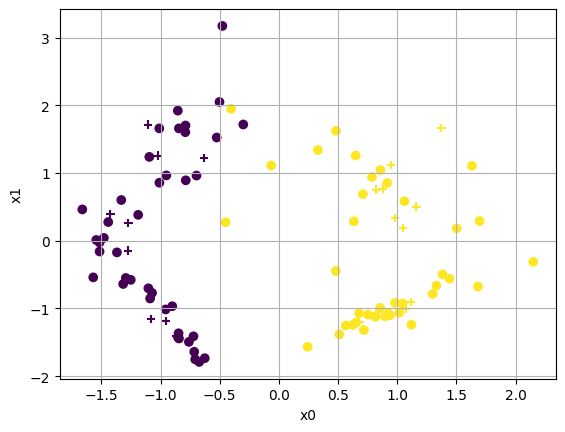

In [62]:
plt.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], c=y_train.numpy())
plt.scatter(x_test.numpy()[:, 0], x_test.numpy()[:, 1], c=y_test.numpy(), marker='+');
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [63]:
model = Feedforward(2, 1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [64]:
model.eval()
y_pred = model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.8806167840957642


In [65]:
model.train()
epochs = 2000

for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)

    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))

Epoch 0: train loss: 0.9718633890151978
Epoch 100: train loss: 0.7234011292457581
Epoch 200: train loss: 0.6385055780410767
Epoch 300: train loss: 0.5806283354759216
Epoch 400: train loss: 0.5256100296974182
Epoch 500: train loss: 0.4735633432865143
Epoch 600: train loss: 0.42577680945396423
Epoch 700: train loss: 0.3833220601081848
Epoch 800: train loss: 0.34647035598754883
Epoch 900: train loss: 0.31490394473075867
Epoch 1000: train loss: 0.28803420066833496
Epoch 1100: train loss: 0.26514381170272827
Epoch 1200: train loss: 0.24555985629558563
Epoch 1300: train loss: 0.22871236503124237
Epoch 1400: train loss: 0.21413250267505646
Epoch 1500: train loss: 0.20144090056419373
Epoch 1600: train loss: 0.19033202528953552
Epoch 1700: train loss: 0.18055686354637146
Epoch 1800: train loss: 0.17191119492053986
Epoch 1900: train loss: 0.16422680020332336


In [66]:
model.eval()
y_pred = model(x_test)
after_test = criterion(y_pred.squeeze(), y_test) 
print('Test loss after Training' , after_test.item())

Test loss after Training 0.09793154895305634


Примерчик посложней:

**CIFAR10**


In [67]:
from torch import optim

In [68]:
import torchvision.transforms as transforms

Загружаем примеры:

    - тренировочный набор

In [72]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


Files already downloaded and verified


Читаем один пример:

In [76]:
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([3, 32, 32])
6


In [77]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

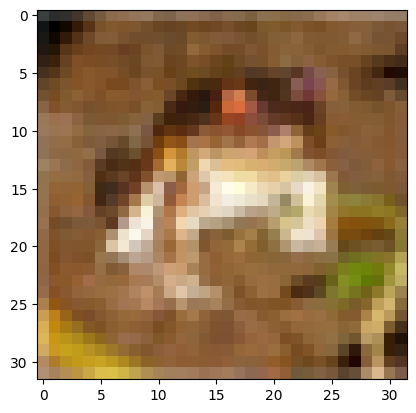

In [78]:
plt.imshow(image.permute(1, 2, 0).numpy());

Создадим загрузчик (генератор пакетов):

In [79]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

Повторим для тестовых данных:

In [80]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


Список классов:

In [81]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

нейронка:

In [82]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Changing the input matrix to the vector view
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [83]:
3 * 32 * 32

3072

Потери и оптимизатор:

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

цикл обучения:

In [85]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.035
Epoch [2/5]. Step [1/782]. Loss: 0.034
Epoch [2/5]. Step [301/782]. Loss: 0.032
Epoch [2/5]. Step [601/782]. Loss: 0.032
Epoch [3/5]. Step [1/782]. Loss: 0.031
Epoch [3/5]. Step [301/782]. Loss: 0.030
Epoch [3/5]. Step [601/782]. Loss: 0.030
Epoch [4/5]. Step [1/782]. Loss: 0.026
Epoch [4/5]. Step [301/782]. Loss: 0.029
Epoch [4/5]. Step [601/782]. Loss: 0.029
Epoch [5/5]. Step [1/782]. Loss: 0.026
Epoch [5/5]. Step [301/782]. Loss: 0.028
Epoch [5/5]. Step [601/782]. Loss: 0.028
Training is finished!


## Загрузка и сохранение модели

### Сохранение модели

In [86]:
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [87]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([400, 3072])
fc1.bias 	 torch.Size([400])
fc2.weight 	 torch.Size([200, 400])
fc2.bias 	 torch.Size([200])
fc3.weight 	 torch.Size([100, 200])
fc3.bias 	 torch.Size([100])
fc4.weight 	 torch.Size([10, 100])
fc4.bias 	 torch.Size([10])


In [88]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### Загрузка и использование модели 

In [89]:
net = Net(3072, 100, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [90]:
net = torch.load(PATH_MODEL)

In [92]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


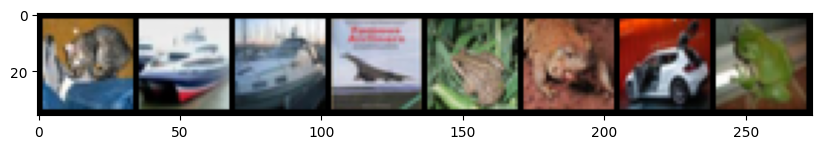

In [93]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [94]:
print(outputs)

tensor([[-4.4756e-01,  7.7848e-01,  7.0537e-03,  1.1209e+00, -3.6162e-01,
          1.6629e+00,  4.6223e-01, -1.7320e+00,  1.6085e-01, -1.3682e+00],
        [ 1.3240e+00,  2.7148e+00, -6.9437e-01, -9.3640e-01, -1.5821e+00,
         -7.4997e-01, -1.9519e+00, -1.9070e+00,  3.4926e+00,  2.5128e+00],
        [ 1.6435e+00,  1.2730e+00, -3.7333e-01, -4.9343e-01, -1.5060e+00,
          3.7698e-03, -2.6973e+00, -1.5213e+00,  3.8241e+00,  1.0753e+00],
        [ 1.8809e+00,  2.0223e-01,  7.7620e-01, -6.3915e-01, -4.1188e-01,
          1.4962e-01, -2.2159e+00, -1.4048e+00,  2.8445e+00, -5.9250e-01],
        [-9.5396e-01, -1.3348e+00,  1.2588e+00,  6.8653e-01,  1.4226e+00,
          1.4332e+00,  1.3330e+00,  3.4943e-02, -1.8629e+00, -2.0537e+00],
        [-1.9614e+00,  3.0562e-01,  3.1313e-01,  1.0554e+00,  6.1803e-01,
          1.2888e+00,  2.4301e+00, -3.0697e-01, -2.2134e+00, -6.2266e-01],
        [-1.7397e+00,  7.4033e-01, -6.4358e-01,  1.9326e+00, -6.6941e-01,
          2.3447e+00,  1.2569e+0

In [95]:
net.predict(images)

/tmp/ipykernel_7235/404917569.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[0.0398, 0.1357, 0.0627, 0.1910, 0.0434, 0.3285, 0.0989, 0.0110, 0.0731,
         0.0159],
        [0.0570, 0.2291, 0.0076, 0.0059, 0.0031, 0.0072, 0.0022, 0.0023, 0.4986,
         0.1872],
        [0.0858, 0.0593, 0.0114, 0.0101, 0.0037, 0.0167, 0.0011, 0.0036, 0.7597,
         0.0486],
        [0.2157, 0.0403, 0.0715, 0.0174, 0.0218, 0.0382, 0.0036, 0.0081, 0.5654,
         0.0182],
        [0.0196, 0.0134, 0.1796, 0.1013, 0.2115, 0.2138, 0.1934, 0.0528, 0.0079,
         0.0065],
        [0.0059, 0.0566, 0.0571, 0.1199, 0.0774, 0.1514, 0.4740, 0.0307, 0.0046,
         0.0224],
        [0.0069, 0.0826, 0.0207, 0.2723, 0.0202, 0.4111, 0.1385, 0.0125, 0.0196,
         0.0155],
        [0.0195, 0.0097, 0.2425, 0.0626, 0.2800, 0.1020, 0.1895, 0.0812, 0.0051,
         0.0078]], grad_fn=<SoftmaxBackward0>)

In [96]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([5, 8, 8, 8, 5, 6, 5, 4])

In [97]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  dog ship ship ship dog frog dog deer


In [98]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['dog' 'ship' 'ship' 'ship' 'dog' 'frog' 'dog' 'deer']
Accuracy is 0.375


# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru